<h2> Численное ОДУ

In [1]:
import numpy as np
from scipy import linalg as LA
import math
import matplotlib.pyplot as plt

<h2> Задание 1

Решите уравнение:
$$
\frac{d u}{d t} = \lambda u
$$

с начальным условием $u(t=0) = u_0$ явным методом Эйлера (с различным шагом  $\tau$, включая случай $|\lambda| \tau > 1$). Считайте, что $u_{0}=1$. Рассмотрите произвольные значения $\lambda$ от 0.1 до 100.

Явная схема Эйлера:

$\dfrac{y_{n+1}-y_n}{\tau} = f(t_n, y_n) = \lambda y_n$

$y_{n+1} = \tau \lambda y_n + y_n = y_n(1+\tau \lambda)$

In [12]:
# 10 случайных значений
lamdas = np.random.uniform(0.1, 100, 10)

# потому что сгенерирует, скорее всего, большие числа, итого 11 значений
lamdas = np.append(lamdas, 0.1)

In [13]:
lamdas

array([37.276225  ,  1.3878437 , 56.75248516, 99.45755035, 38.34133749,
       32.83555496, 81.31367967, 12.28541926, 66.20323663, 84.01946343,
        0.1       ])

In [17]:
def find_solution1(tau, lamb):
    eps = 1e-2
    y = 1
    y_prev = 2 # просто чтобы не остановиться сразу
    while(abs(y-y_prev) > eps):
        y_prev = y
        y = y * (1 + tau * lamb)
    return y

In [20]:
tau = 0.0001
for l in lamdas:
    print("tau = ", tau, " lambda = ", l, " Solution: ", find_solution1(tau, l))

tau =  0.0001  lambda =  37.27622500067155  Solution:  1.003727622500067
tau =  0.0001  lambda =  1.3878436970813215  Solution:  1.000138784369708
tau =  0.0001  lambda =  56.75248515708388  Solution:  1.0056752485157083
tau =  0.0001  lambda =  99.45755035225588  Solution:  1.0099457550352255
tau =  0.0001  lambda =  38.341337487509826  Solution:  1.003834133748751
tau =  0.0001  lambda =  32.83555496225057  Solution:  1.0032835554962252
tau =  0.0001  lambda =  81.31367966652128  Solution:  1.0081313679666521
tau =  0.0001  lambda =  12.28541925843162  Solution:  1.001228541925843
tau =  0.0001  lambda =  66.20323663038467  Solution:  1.0066203236630384
tau =  0.0001  lambda =  84.01946342598993  Solution:  1.008401946342599
tau =  0.0001  lambda =  0.1  Solution:  1.00001


In [22]:
tau = 0.00001
for l in lamdas:
    print("tau = ", tau, " lambda = ", l, " Solution: ", find_solution1(tau, l))

tau =  1e-05  lambda =  37.27622500067155  Solution:  1.0003727622500067
tau =  1e-05  lambda =  1.3878436970813215  Solution:  1.0000138784369708
tau =  1e-05  lambda =  56.75248515708388  Solution:  1.0005675248515709
tau =  1e-05  lambda =  99.45755035225588  Solution:  1.0009945755035226
tau =  1e-05  lambda =  38.341337487509826  Solution:  1.000383413374875
tau =  1e-05  lambda =  32.83555496225057  Solution:  1.0003283555496225
tau =  1e-05  lambda =  81.31367966652128  Solution:  1.0008131367966653
tau =  1e-05  lambda =  12.28541925843162  Solution:  1.0001228541925844
tau =  1e-05  lambda =  66.20323663038467  Solution:  1.0006620323663038
tau =  1e-05  lambda =  84.01946342598993  Solution:  1.00084019463426
tau =  1e-05  lambda =  0.1  Solution:  1.000001


In [33]:
# В нашем случае если |lambda|*tau>1, то каждый yвеличивается более чем в 2 раза, расходимся:
print("tau = ", 0.1, " lambda = ", 80, " Solution: ", find_solution1(0.1, 80))

tau =  0.1  lambda =  80  Solution:  inf


<h2> Задание 2

Решите уравнение:
$$
\frac{d u}{d t} = \lambda u
$$

с начальным условием $u(t=0) = u_0$ неявным методом Эйлера (с различным шагом  $\tau$, включая случай $|\lambda| \tau > 1$). Сравните результаты с результатами для явного метода Эйлера.

Явная схема Эйлера:

$\dfrac{y_{n+1}-y_n}{\tau} = f(t_n, y_n) = \lambda y_{n+1}$

$y_{n+1} (1 - \tau \lambda ) =y_n $

$y_{n+1} = \dfrac{y_n}{1 - \tau \lambda}$

In [24]:
# 10 случайных значений
lamdas = np.random.uniform(0.1, 100, 10)

# потому что сгенерирует, скорее всего, большие числа, итого 11 значений
lamdas = np.append(lamdas, 0.1)

In [25]:
def find_solution2(tau, lamb):
    eps = 1e-2
    y = 1
    y_prev = 2 # просто чтобы не остановиться сразу
    while(abs(y-y_prev) > eps):
        y_prev = y
        y = y / (1 - tau * lamb)
    return y

In [28]:
tau = 0.0001
for l in lamdas:
    print("tau = ", tau, " lambda = ", l, " Solution: ", find_solution2(tau, l))

tau =  0.0001  lambda =  36.233470540981706  Solution:  1.0036365234405937
tau =  0.0001  lambda =  54.46723932672665  Solution:  1.0054765532060888
tau =  0.0001  lambda =  57.35089999762182  Solution:  1.0057681709794635
tau =  0.0001  lambda =  12.81548165451193  Solution:  1.0012831926386232
tau =  0.0001  lambda =  22.769773898825257  Solution:  1.0022821738481345
tau =  0.0001  lambda =  0.273381881078379  Solution:  1.0000273389355048
tau =  0.0001  lambda =  94.4656598023507  Solution:  1.0095366546173081
tau =  0.0001  lambda =  76.16184521810166  Solution:  1.0076746359654607
tau =  0.0001  lambda =  11.461845924982674  Solution:  1.0011474998391339
tau =  0.0001  lambda =  58.113273908631406  Solution:  1.005845296321484
tau =  0.0001  lambda =  0.1  Solution:  1.000010000100001


In [29]:
tau = 0.00001
for l in lamdas:
    print("tau = ", tau, " lambda = ", l, " Solution: ", find_solution2(tau, l))

tau =  1e-05  lambda =  36.233470540981706  Solution:  1.0003624660394355
tau =  1e-05  lambda =  54.46723932672665  Solution:  1.0005449692229582
tau =  1e-05  lambda =  57.35089999762182  Solution:  1.0005738381012919
tau =  1e-05  lambda =  12.81548165451193  Solution:  1.0001281712423071
tau =  1e-05  lambda =  22.769773898825257  Solution:  1.0002277495970566
tau =  1e-05  lambda =  0.273381881078379  Solution:  1.0000027338262845
tau =  1e-05  lambda =  94.4656598023507  Solution:  1.0009455498178976
tau =  1e-05  lambda =  76.16184521810166  Solution:  1.0007621989569708
tau =  1e-05  lambda =  11.461845924982674  Solution:  1.000114631598147
tau =  1e-05  lambda =  58.113273908631406  Solution:  1.0005814706507183
tau =  1e-05  lambda =  0.1  Solution:  1.000001000001


В целом, результаты очень похожи на те, что были получены в явном методе Эйлера. Время выполнения и полученные результаты довольно похожи.

In [35]:
# В нашем случае если |lambda|*tau>1, то в отличие от явного метода, мы СОЙДЕМСЯ
print("tau = ", 0.1, " lambda = ", 80, " Solution: ", find_solution2(0.1, 80))

tau =  0.1  lambda =  80  Solution:  0.00041649312786339027


Но результат при этом получился не очень хороший.

<h2> Задание 3

Рассмотрим уравнение, описывающее поведение маятника

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Приведите это уравнение к системе дифференциальных уравнений 1-го порядка.

3.1 Решите полученную систему уравнений с помощью явного метода Эйлера. 

3.2 Известно, что в уравнении движения маятника сохраняется энергия, т. е. 

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

остаётся постоянной величиной. Постройте зависимость $E$ от времени для Вашего численного решения. Подтврждается ли сохранение энергии?

3.3 Реализуйте метод Рунге–Кутты 2-го порядка. Сравните решения полученные этими методами (для различных шагов дискретизации расчётной сетки).

Система дифференциальных уравнений 1-го порядка:

\begin{equation*}
 \begin{cases}
   \dfrac{du}{dt} = v 
   \\
   \dfrac{dv}{dt} = - \omega^2 u 
 \end{cases}
\end{equation*}

**3.1**

In [54]:
def solve_eyler(tau, omega):
    u = 1
    v = 1
    u_prev = 10
    v_prev = 10
    eps = 1e-3
    while(abs(u-u_prev) > eps or abs(v-v_prev) > eps):
        u_prev = u
        v_prev = v
        u = u + tau * v
        v = v + tau * omega * omega * u_prev
    return u, v

In [55]:
solve_eyler(0.0001, 0.01)

(1.0001, 1.00000001)

**3.2**

In [70]:
def get_E(t, omega):
    u, v = solve_eyler(t, omega)
    E = 0.5 * v**2 + 0.5 * u**2 * omega**2
    return E

In [78]:
tau = 0.0001
E = []

for omega in np.linspace(0.01, 0.1, 12):
    # omega = 1/T
    e = get_E(tau, omega)
    print(e)
    E.append(e)

0.5000500200004999
0.5001653553735543
0.5003476596728992
0.5005969328985361
0.5009131750504672
0.5012963861286948
0.501746566133222
0.5022637150640528
0.502847832921191
0.5034989197046413
0.5042169754144091
0.5050020000505


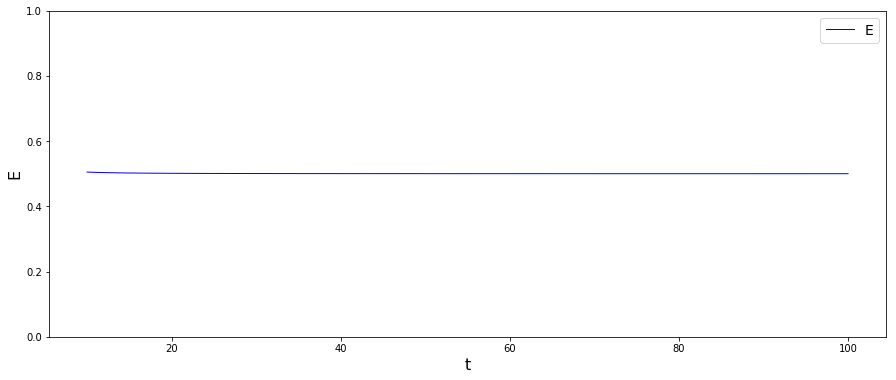

In [81]:
omegas = np.linspace(0.01, 0.1, 12)
plt.figure(figsize=(15, 6))
plt.plot(1/omegas, E, color = 'blue', label = "E", linewidth = 1)
plt.xlabel('t', fontsize=16)
plt.ylabel('E', fontsize=16)
plt.legend(fontsize=14)
plt.ylim(0, 1)
plt.show()

Действительно, сохраняется.

**3.3**

2-й порядок:

$b_1c_1+b_2c_2=\dfrac{1}{2}$

$b_1+b_2=1$

$c_1 = a_{11} + a_{12}$

$c_2 = a_{21} + a_{22}$

Считаем: $c_1 = 0$, $a_{11} = a_{12} = a_{22} = 0$,

тогда имеем:

$y_{n+1} = y_n + f(t_n +\dfrac{h}{2}, y_n + \dfrac{h}{2} f(t_n, y_n))$

In [82]:
def solve_rk(t, h, omega):
    u = 1
    v = 1
    u_prev = 10
    v_prev = 10
    eps = 1e-3
    while(abs(u-u_prev) > eps or abs(v-v_prev) > eps):
        u_prev = u
        v_prev = v 
        u = u + v * h/2
        v = v - omega**2 * (u * h/2)
    return u, v

In [91]:
solve_rk(0.001, 0.001, 0.01)

(1.0005, 0.999999949975)

In [94]:
def get_E2(t, h, omega):
    u, v = solve_rk(t, h, omega)
    E = 0.5 * v**2 + 0.5 * u**2 * omega**2
    return E

In [95]:
tau = 0.0001
E2 = []

for omega in np.linspace(0.01, 0.1, 12):
    # omega = 1/T
    e = get_E2(tau, 0.001, omega)
    print(e)
    E2.append(e)

0.5000499999875012
0.5001652892148897
0.5003475205743373
0.5005966940658807
0.50091280968957
0.5012958674454686
0.5017458673336536
0.5022628093542156
0.5028466935072583
0.5034975197928994
0.5042152882112693
0.5049999987625124


Возьмем другой шаг:

In [96]:
tau = 0.0001
E2 = []

for omega in np.linspace(0.01, 0.01, 12):
    # omega = 1/T
    e = get_E2(tau, 0.001, omega)
    print(e)
    E2.append(e)

0.5000499999875012
0.5000499999875012
0.5000499999875012
0.5000499999875012
0.5000499999875012
0.5000499999875012
0.5000499999875012
0.5000499999875012
0.5000499999875012
0.5000499999875012
0.5000499999875012
0.5000499999875012


Так, с уменьшением шага, результаты стали еще более точными.

Результаты совпали с полученными в первой части.